# Imports
numpy package for array manipulation

Matplotlib package to plot certain figures of data

Tensorflow package since its the framework we are going to use , getting data, training ,testing and predictions are done using this framework

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\phani.thontepu\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Importing the dataset

`tf.keras.datasets.mnist` is a module which have a fucntion named `load_data()` which tries to download data and put it in form of tuples of test data and train data

In [5]:
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

# Inspecting the data

Just to have a overview of the data 
* we will check the lengths of array 
* types of objects 
* visulizing a sample

After Execution 
* There are 60000 training sample images each of 28X28 pixels size and there are 60000 labels for that.
* There are 10000 testing sample images each of 28*28 pixels size and there are 10000 lables for that.
* Every integer value in y_train tells what is the number that there in that picture.
* Verification that the first Image viewed contains ``5`` as numer and first element in the label array is also an five

Types of Object :-  
X_trian <class 'numpy.ndarray'> 
y_train <class 'numpy.ndarray'> 
X_test <class 'numpy.ndarray'> 
y_test <class 'numpy.ndarray'>
Shapes of arrays :-  
X_trian (60000, 28, 28) 
y_train (60000,) 
X_test (10000, 28, 28) 
y_test (10000,)
Checking first ten lables train set :- [5 0 4 1 9 2 1 3 1 4]
Checking first ten lables test set:- [7 2 1 0 4 1 4 9 5 9]
Visualizing first Image:- 



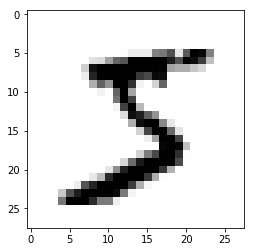

In [6]:
print('Types of Object :- ','\nX_trian',type(X_train),'\ny_train',type(y_train),'\nX_test',type(X_test),'\ny_test',type(y_test))
print('Shapes of arrays :- ','\nX_trian',np.shape(X_train),'\ny_train',np.shape(y_train),'\nX_test',np.shape(X_test),'\ny_test',np.shape(y_test))
print('Checking first ten lables train set :-',y_train[:10])
print('Checking first ten lables test set:-',y_test[:10])
print('Visualizing first Image:- \n')
plt.imshow(X_train[0],cmap =plt.cm.binary)

# Normalizing the data
As a part of preprocessing the data Normalization need to be done
normalization is required because
* training faster 
* reduce the chances of getting stuck in local optima
* weight decay and Bayesian estimation can be done more conveniently 

we are using `tf.keras.utils.normalize` fuction to normalize
> Note: Normalizing is form of scaling all the inputs to a scale of domain . Standardization or rescaling can also be done insted of normalizing depending upon the problem. Its just we are bringing all the inputs into a scale domain so that the neural network would treat all the inputs with same effect.

In [7]:
X_train = tf.keras.utils.normalize(X_train,axis = 1)
X_test = tf.keras.utils.normalize(X_test,axis = 1)

# Initiating a Model
Building a artificical neural network model.

Line1 : we create a model object from `tf.keras.models.Sequential()` which would give a kearas model object
> Note : in the deep learning world neuralnetwork and model both words are interchably used .They mean the same thing

In [8]:
model = tf.keras.models.Sequential()

# Adding layers to Model
A neural network would consit of layers and layers of neurons. One adding one layer after other we create a neural network model. Adding of layers is done using `model.add()` function.

Line1 : Adding a layer from `tf.keras.layers.Flatten()` class. Flatten layer is just a line of neurons to the network. A simple line of neurons

Line2 : Adding a layer from `tf.keras.layers.Dense()` class. Dense layer is nothing but Fully connected layer where every neuron of this layer is connected to every other nuron of previous layer and next layer. We are using ``rectified linear unit`` as activation function . Activation fucntion is a fuction which takes a value as input and gives a value based on how the function is defined

Line3 : Its simliar to line two.

Line4 : This is also a dense layer but the activation function is changed. softmax activation function would distribute the propability over the output classes.

In [9]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

# Compiling Model

Compiling the model of configuring the model with what optimizer to be used, loss function to be used and metrics to be calculated. It also checks the incompactability among layers. Any error while building the model.
Here we are using 
* `adam` optimizer
* `sparse_categorical_crossentropy` as objective/loss/cost function
* `accuracy` as metric

In [10]:
model.compile(optimizer= 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# Training the Model

Trainig is the process of tuning the weights of the neural network with the help of trainig data. Forevery epoch mutple iterations of batch sizes are passed through the network and loss is backpropagated through the network.

For every epoch:-
* Iterations are run (Number of iterations are calculated by iterations = no of train samples / batch size)
    
    For Every Iteration:- 
    * A sample of data point of size equivalent to batch size is taken
    * This sample is froward propagated through the network. 
    * loss is calculated according to the loss function
    * Backward Propagation takes palce and Weights are adjusted.
 
The above process is done for all epochs and this process is training. We are changing the weights of the model towards attaining a minimum loss value.   

In [ ]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.2680 - acc: 0.9213
Epoch 2/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.1079 - acc: 0.9671
Epoch 3/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0739 - acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.0550 - acc: 0.9828
Epoch 5/10
26720/60000 [============>.................] - ETA: 5s - loss: 0.0365 - acc: 0.9877

# Evaluating the Model

Evaluationg is process checking how good is neural network doing with the data it has never seen before. `X_test` is data which neural network have never seen before. It tries to determine the how good its predictions with the `X_test`.<br/>
`val_loss` : loss acquired on test data.<br/>
`val_acc` : Accuracy on test data

In [ ]:
loss,acc = model.evaluate(X_test,y_test)
print('The loss acquired',loss)
print('The accuracy attained',acc)

# Predicting on Trained Model

Now the model is fit for making any kind of predictions.The input to `model.predict()` should be a list. Here `X_test` is used for predictions but any digit image of size 28x28 can be used for predictions.

In [62]:
predictions = model.predict([X_test])

# Predictions

`predictions` is an list obtained on trying predict every digit in X_test list. 

On priniting first element we get an array of ten values. Each value determining the propability of the image being that class.

for example, if the first element of preditions list is like this 
```python 
[2.32561842e-16 3.39266701e-12 8.58853245e-13 3.40553336e-10
 3.20900098e-20 7.71152877e-16 1.18972635e-26 1.00000000e+00
 1.45465700e-17 2.35815881e-12]
```
it means the model thinks ...
the propability of image being 1 is 2.32561842e-16 <br/>
the propability of image being 2 is 3.39266701e-12 <br/>
the propability of image being 3 is 8.58853245e-13 <br/>
.<br/>
.<br/>
.<br/>
the propability of image being 7 is 1.00000000e+00 <br/>
. <br/>
. <br/>
`np.argmax()` would return the maximum argument in the list.

In [3]:
print(predictions[0])
print('The value of prediction is ',np.argmax(predictions[0]))

NameError: name 'predictions' is not defined

# Verifying the prediction

we cheked the prediction of the first element <br/>
Now we are visulizing the first element to check if the prediction is valid.
> Note : we are trying to visualize a normalized Image so it might not appear clear as it supposed to be

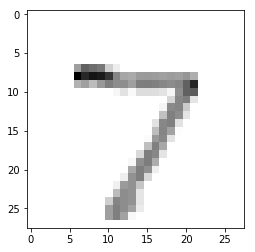

In [44]:
plt.imshow(X_test[0],cmap = plt.cm.binary)